# 1. Importation des Librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout

# 2. Charger les donnees

In [4]:
data = pd.read_csv('Data/darknet.csv')
data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,Non-Tor,Chat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,139214,10.8.8.130-64.4.23.162-52161-40019-6,10.8.8.130,52161,64.4.23.162,40019,6,5/6/2015 11:50,119786918,4,...,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,VPN,File-Transfer
22572,139215,10.8.8.130-69.181.136.22-53288-57191-6,10.8.8.130,53288,69.181.136.22,57191,6,5/6/2015 11:50,119546234,21,...,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,VPN,File-Transfer
22573,139216,10.8.8.130-69.181.136.22-49539-57191-17,10.8.8.130,49539,69.181.136.22,57191,17,5/6/2015 11:50,119749355,24,...,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,VPN,File-Transfer
22574,139217,10.8.8.130-81.137.205.196-49539-23528-17,10.8.8.130,49539,81.137.205.196,23528,17,5/6/2015 11:50,119992029,8,...,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,VPN,File-Transfer


# 3. Analyse de données

In [6]:
data.shape

(22576, 86)

In [7]:
data.columns

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Len

In [8]:
data['Label'].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [9]:
data['Label.1'].unique()

array(['Chat', 'File-Transfer'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  object 
 2   Src IP                      22576 non-null  object 
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  object 
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  object 
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

# 4. Prétraitement des données

In [12]:
data.drop(columns=['Flow ID', 'Timestamp'], inplace=True, axis=1)
# data.drop(columns=['Src IP', 'Dst IP'], inplace=True, axis=1)
data.head()

,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6,5222,10.152.152.11,56297,6,60320002,5,3,447,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1,0,8.0.6.4,0,0,100709850,6,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6,5222,10.152.152.11,56297,6,116498878,12,12,5848,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1,0,8.0.6.4,0,0,93296196,6,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6,5222,10.152.152.11,56297,6,91832679,14,14,6029,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


In [13]:
encoder = LabelEncoder()
data['Src IP'] = encoder.fit_transform(data['Src IP'])
data['Dst IP'] = encoder.fit_transform(data['Dst IP'])
data['Label'] = encoder.fit_transform(data['Label'])
data['Label.1'] = encoder.fit_transform(data['Label.1'])
data.head()

,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,563,5222,4,56297,6,60320002,5,3,447,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
1,32872,709,0,1458,0,0,100709850,6,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
2,32873,563,5222,4,56297,6,116498878,12,12,5848,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
3,32874,709,0,1458,0,0,93296196,6,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
4,32875,563,5222,4,56297,6,91832679,14,14,6029,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


In [14]:
data.isnull().sum()

Unnamed: 0    0
Src IP        0
Src Port      0
Dst IP        0
Dst Port      0
             ..
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Label.1       0
Length: 84, dtype: int64

In [15]:
# Affiche les lignes contennant NaN ou Infinity
data[data.isin([np.nan, np.inf]).any(axis=1)]

,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
31,32902,246,443,4,52701,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
276,33147,386,443,4,37492,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
302,33173,522,443,4,41051,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
1749,104832,537,80,195,65089,6,0,2,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1,0
1852,106509,173,13000,195,64584,6,0,2,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1,0
13624,35853,10,47339,1079,443,6,0,1,1,53,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
14197,36426,554,80,4,44537,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
14401,36630,481,443,4,60982,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
14411,36640,10,45140,909,443,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1
14418,36647,279,443,4,56194,6,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,1


In [16]:
# Affiche les colonnes contennant NaN ou Infinity
data.loc[:, data.isin([np.nan, np.inf]).any(axis=0)]

,Flow Bytes/s,Flow Packets/s
0,9.350132,0.132626
1,0.000000,0.059577
2,72.481385,0.206011
3,0.000000,0.064311
4,95.717560,0.304902
...,...,...
22571,0.050089,0.050089
22572,1.555883,0.284409
22573,5.561617,0.242172
22574,2.566837,0.116674


In [17]:
data['Flow Bytes/s'] = pd.to_numeric(data['Flow Bytes/s'].replace({np.nan: 0.0001, np.inf:data['Flow Bytes/s'].max}), errors='coerce')
data['Flow Packets/s'] = pd.to_numeric(data['Flow Packets/s'].replace({np.nan: 0.0001, np.inf:data['Flow Packets/s'].max}), errors='coerce')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Src IP                      22576 non-null  int32  
 2   Src Port                    22576 non-null  int64  
 3   Dst IP                      22576 non-null  int32  
 4   Dst Port                    22576 non-null  int64  
 5   Protocol                    22576 non-null  int64  
 6   Flow Duration               22576 non-null  int64  
 7   Total Fwd Packet            22576 non-null  int64  
 8   Total Bwd packets           22576 non-null  int64  
 9   Total Length of Fwd Packet  22576 non-null  int64  
 10  Total Length of Bwd Packet  22576 non-null  int64  
 11  Fwd Packet Length Max       22576 non-null  int64  
 12  Fwd Packet Length Min       22576 non-null  int64  
 13  Fwd Packet Length Mean      225

# 5. Diviser les données : Train, Val et Test (plus la Normalisation)

In [20]:
X = data.drop(columns=['Label', 'Label.1'], axis=1)
label_0 = data['Label']
label_1 = data['Label.1']
# y = label_0
# Decommenter cette ligne puis commenter la suivante revient a changer le probleme binaire en multiclasse
# Il ne faut donc pas oublier de decommenter aussi les dernieres fonctions d'activation du SNN et du DNN
y = label_1

In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
22571    1
22572    1
22573    1
22574    1
22575    1
Name: Label.1, Length: 22576, dtype: int32

In [22]:
X.head()

,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,32871,563,5222,4,56297,6,60320002,5,3,447,...,2,20,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15
1,32872,709,0,1458,0,0,100709850,6,0,0,...,0,0,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15
2,32873,563,5222,4,56297,6,116498878,12,12,5848,...,7,20,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15
3,32874,709,0,1458,0,0,93296196,6,0,0,...,0,0,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15
4,32875,563,5222,4,56297,6,91832679,14,14,6029,...,8,20,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Src IP                      22576 non-null  int32  
 2   Src Port                    22576 non-null  int64  
 3   Dst IP                      22576 non-null  int32  
 4   Dst Port                    22576 non-null  int64  
 5   Protocol                    22576 non-null  int64  
 6   Flow Duration               22576 non-null  int64  
 7   Total Fwd Packet            22576 non-null  int64  
 8   Total Bwd packets           22576 non-null  int64  
 9   Total Length of Fwd Packet  22576 non-null  int64  
 10  Total Length of Bwd Packet  22576 non-null  int64  
 11  Fwd Packet Length Max       22576 non-null  int64  
 12  Fwd Packet Length Min       22576 non-null  int64  
 13  Fwd Packet Length Mean      225

In [24]:
X = StandardScaler().fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=75)

In [27]:
print("X-train:", X_train.shape)
print("X-val:", X_val.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-val:", y_val.shape)
print("y-test:", y_test.shape)

X-train: (13545, 82)
X-val: (4515, 82)
X-test: (4516, 82)
y-train: (13545,)
y-val: (4515,)
y-test: (4516,)


# Étape 6 : Constructon et evaluation des modeles

## 6.1 SNN

In [30]:
SNN = Sequential()

SNN.add(InputLayer(shape=(X.shape[1],)))
SNN.add(Dense(32, activation='relu'))
SNN.add(Dense(1, activation='sigmoid'))    #[pour label 1]
# model.add(Dense(4, activation='softmax'))   [pour label 0]

SNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

SNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         2,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history_snn = SNN.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

### 6.1.1 : Visualiser l’évolution de l’entrainement du réseau du SNN

In [33]:
epoch_accuracy_snn = history_snn.history['accuracy']
epoch_loss_snn = history_snn.history['loss']

epoch_val_accuracy_snn = history_snn.history['val_accuracy']
epoch_val_loss_snn = history_snn.history['val_loss']

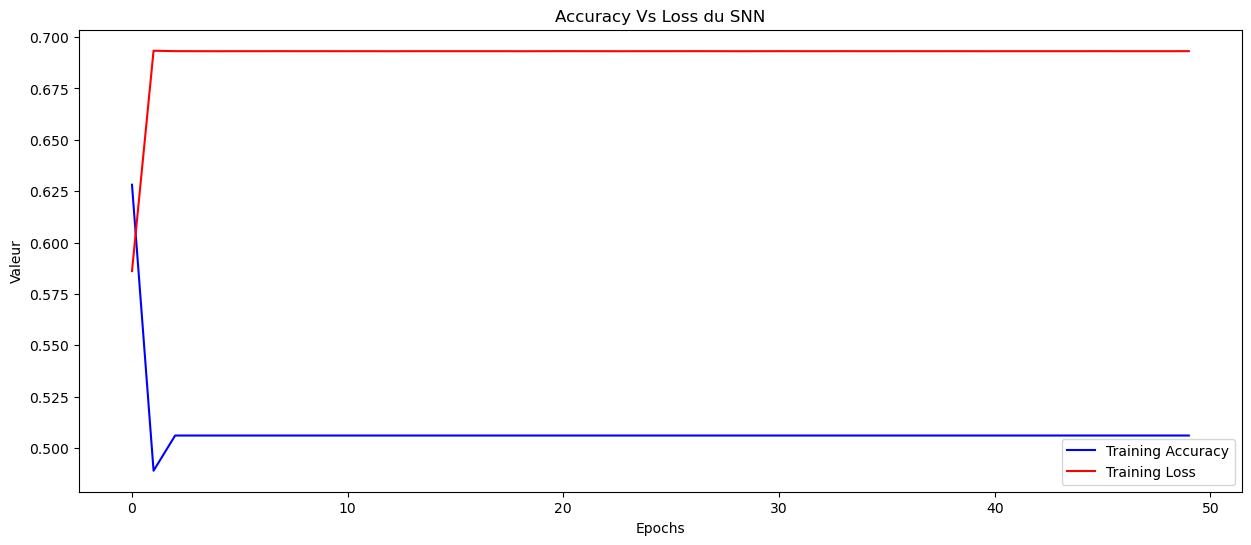

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy_snn)), epoch_accuracy_snn, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss_snn)), epoch_loss_snn, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss du SNN')
plt.legend()
plt.plot()
plt.show()

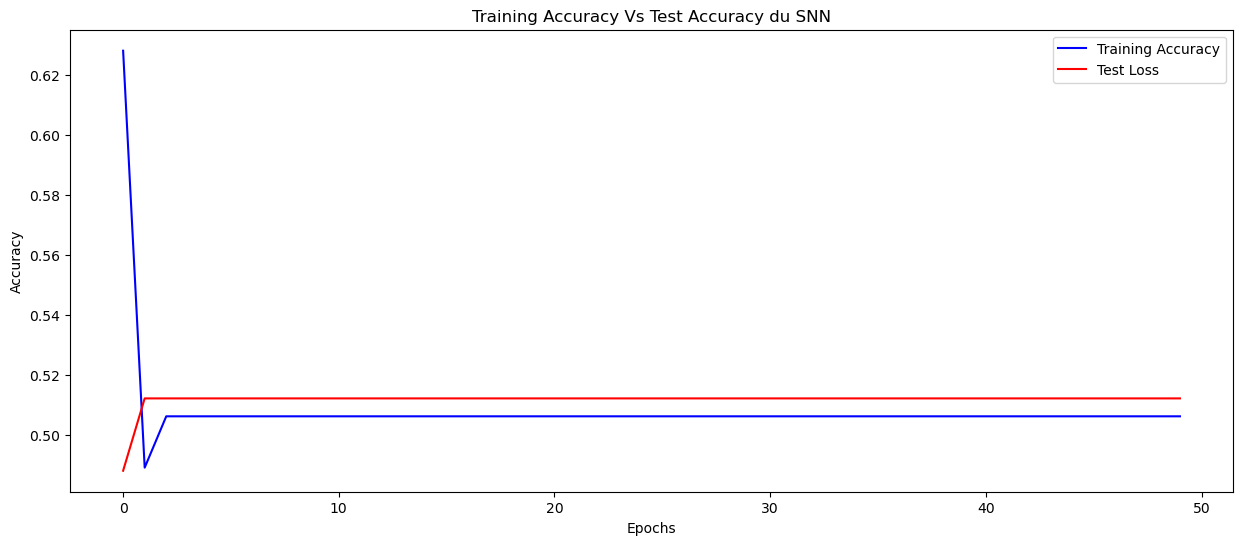

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy_snn)), epoch_accuracy_snn, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy_snn)), epoch_val_accuracy_snn, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy du SNN')
plt.legend()
plt.plot()
plt.show()

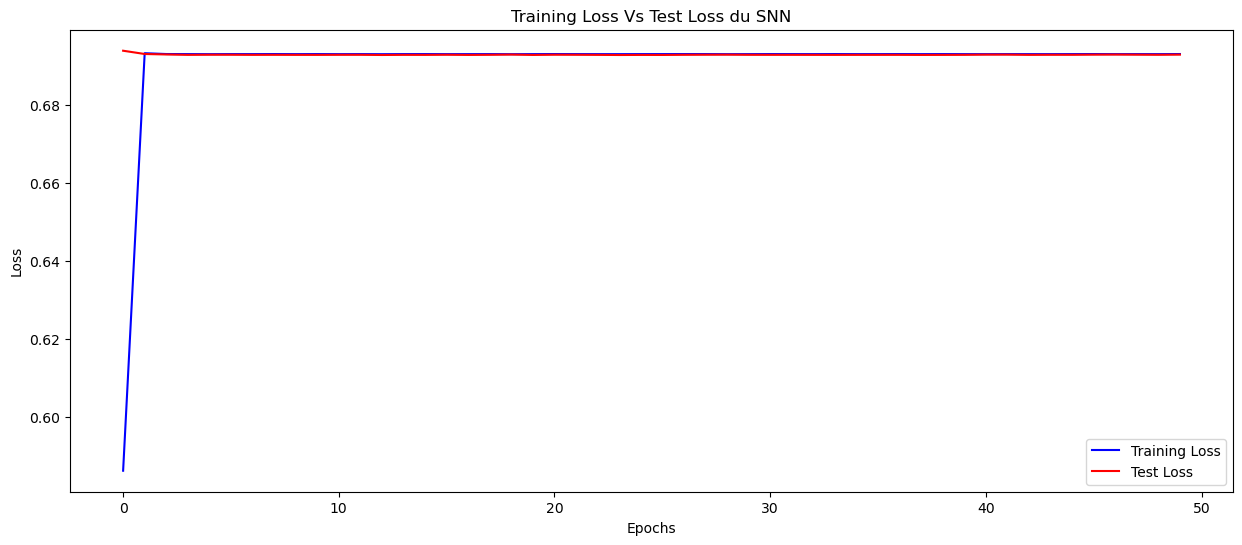

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss_snn)), epoch_loss_snn, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss_snn)), epoch_val_loss_snn, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss du SNN')
plt.legend()
plt.plot()
plt.show()

### 6.1.2 Evaluation du SNN

In [38]:
SNN.evaluate(X_test, y_test)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 0.6931 


[0.6929818987846375, 0.5117360353469849]

## 6.2 DNN

In [40]:
DNN = Sequential()

DNN.add(InputLayer(shape=(X.shape[1],)))
DNN.add(Dense(32, activation='relu'))
DNN.add(Dropout(0.25))
DNN.add(Dense(32, activation='relu'))
DNN.add(Dropout(0.25))
DNN.add(Dense(32, activation='relu'))
DNN.add(Dense(1, activation='sigmoid'))    #[pour label 1]
# model.add(Dense(4, activation='softmax'))   [pour label 0]

DNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

DNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         2,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history_dnn = DNN.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

### 6.2.1 : Visualiser l’évolution de l’entrainement du réseau du DNN

In [43]:
epoch_accuracy_dnn = history_dnn.history['accuracy']
epoch_loss_dnn = history_dnn.history['loss']

epoch_val_accuracy_dnn = history_dnn.history['val_accuracy']
epoch_val_loss_dnn = history_dnn.history['val_loss']

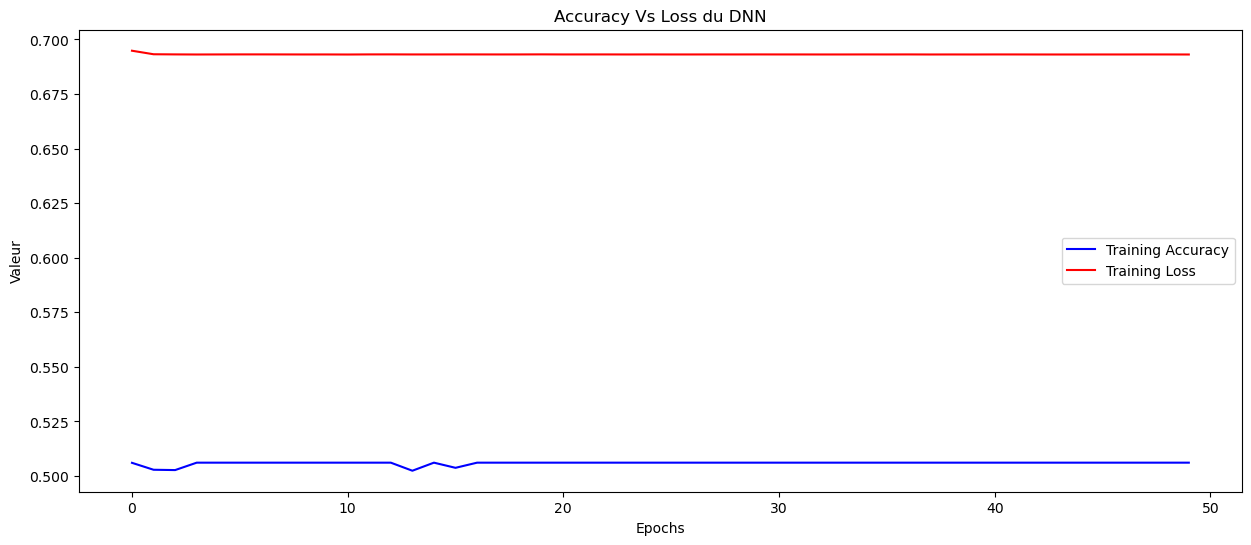

In [44]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy_dnn)), epoch_accuracy_dnn, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss_dnn)), epoch_loss_dnn, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss du DNN')
plt.legend()
plt.plot()
plt.show()

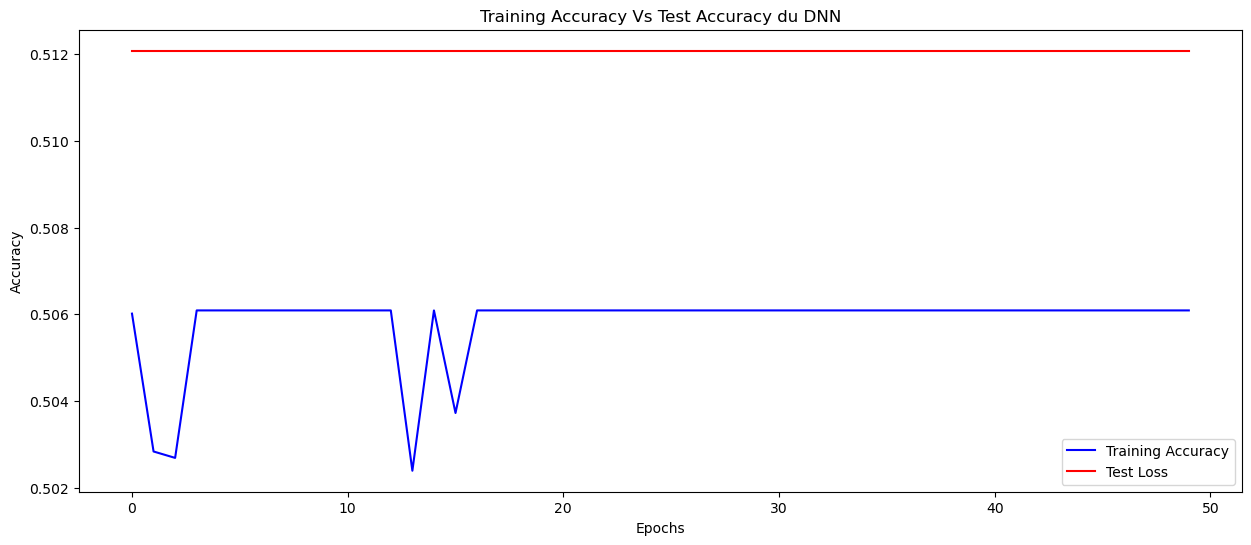

In [45]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy_dnn)), epoch_accuracy_dnn, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy_dnn)), epoch_val_accuracy_dnn, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy du DNN')
plt.legend()
plt.plot()
plt.show()

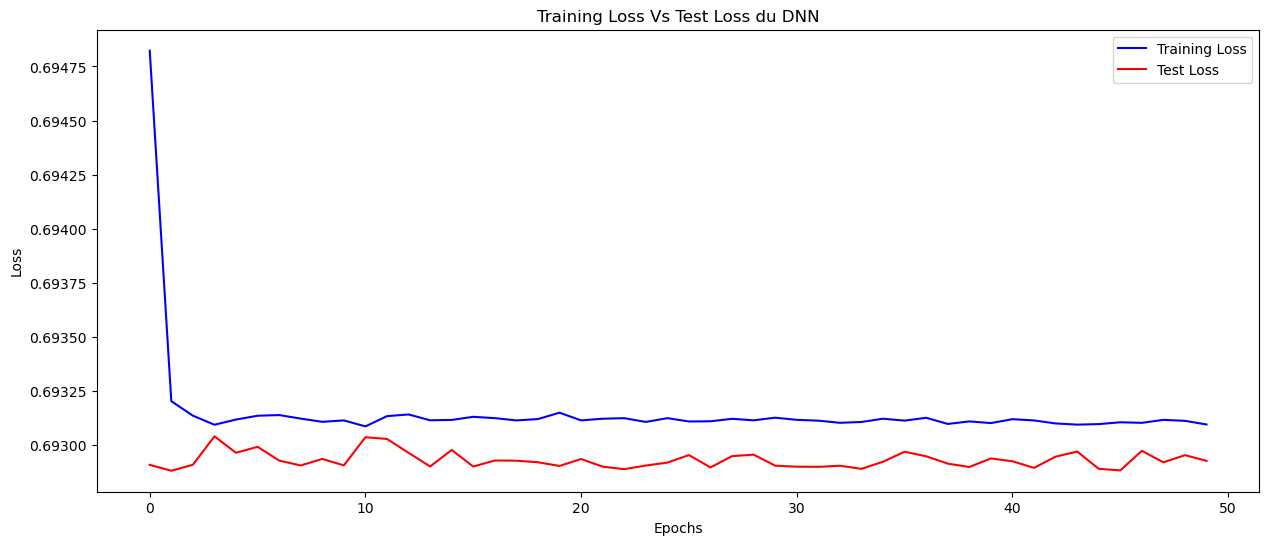

In [46]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss_dnn)), epoch_loss_dnn, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss_dnn)), epoch_val_loss_dnn, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss du DNN')
plt.legend()
plt.plot()
plt.show()

### 6.2.2 Evaluation du DNN

In [48]:
DNN.evaluate(X_test, y_test)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6931 


[0.6929357051849365, 0.5117360353469849]